# 주식의 기술적 분석 및 백테스트

## TALib 패키지

* http://ta-lib.org/
* 주식 차트의 기술적 분석을 위한 200여 가지의 지표 함수를 제공하는 C 라이브러리
 * 함수 목록: http://ta-lib.org/function.html
* Python 패키지 및 엑셀 플러그 인 제공
 * https://github.com/mrjbq7/ta-lib
 * http://mrjbq7.github.io/ta-lib/doc_index.html

In [128]:
import talib

In [131]:
# list of functions
talib.get_functions()

['ATR',
 'NATR',
 'TRANGE',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'BETA',
 'CORREL',
 'LINEARREG',
 'LINEARREG_ANGLE',
 'LINEARREG_INTERCEPT',
 'LINEARREG_SLOPE',
 'STDDEV',
 'TSF',
 'VAR',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLE

In [133]:
from pprint import pprint
pprint(talib.get_function_groups())

{'Cycle Indicators': ['HT_DCPERIOD',
                      'HT_DCPHASE',
                      'HT_PHASOR',
                      'HT_SINE',
                      'HT_TRENDMODE'],
 'Math Operators': ['ADD',
                    'DIV',
                    'MAX',
                    'MAXINDEX',
                    'MIN',
                    'MININDEX',
                    'MINMAX',
                    'MINMAXINDEX',
                    'MULT',
                    'SUB',
                    'SUM'],
 'Math Transform': ['ACOS',
                    'ASIN',
                    'ATAN',
                    'CEIL',
                    'COS',
                    'COSH',
                    'EXP',
                    'FLOOR',
                    'LN',
                    'LOG10',
                    'SIN',
                    'SINH',
                    'SQRT',
                    'TAN',
                    'TANH'],
 'Momentum Indicators': ['ADX',
                         'ADXR',
                  

## TALib 사용 예

In [208]:
np.random.seed(0)
close = np.random.random(250)

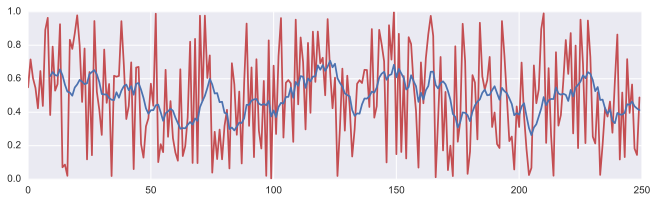

In [225]:
sma = talib.SMA(close, timeperiod=10)
plt.figure(figsize=(11,3))
plt.plot(close, "r-")
plt.plot(sma, "b-")
plt.show()

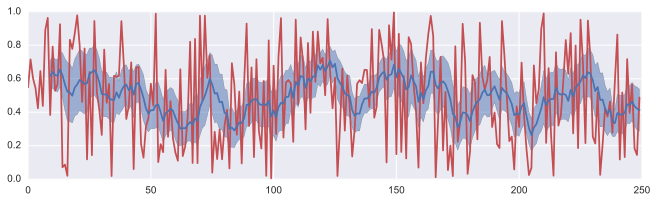

In [226]:
upper, middle, lower = talib.BBANDS(close, timeperiod=10, nbdevup=0.5, nbdevdn=0.5)
plt.figure(figsize=(11,3))
sma = talib.SMA(close)
plt.plot(close, "r-")
plt.plot(middle, "b-")
plt.fill_between(np.arange(len(close)), lower, upper, alpha=0.5)
plt.show()

## zipline 패키지

* http://www.zipline.io/
* Quantopian 에서 개발한 Python용 주식 백테스트 패키지

### 백테스트 방법

1. `TradingAlgorithm` 클래스 구현
 * `initialize` 메서드: 알고리즘 초기화
 * `handle_data` 메서드: 데이터 이벤트 핸들링
2. 백테스트용 데이터 확보
3. `TradingAlgorithm` 클래스 객체의 `run` 메서드 호출
4. 결과 분석

* https://github.com/quantopian/zipline/blob/f3e436a1bf7b6adb74a5d925e831658dad5da1f5/zipline/examples/dual_ema_talib.py

In [179]:
import numpy as np
from talib import EMA
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm


def initialize(context):
    context.asset = symbol('AAPL')

    # To keep track of whether we invested in the stock or not
    context.invested = False


def handle_data(context, data):
    trailing_window = data.history(context.asset, 'price', 40, '1d')
    if trailing_window.isnull().values.any():
        return

    short_ema = EMA(trailing_window.values, timeperiod=20)
    long_ema = EMA(trailing_window.values, timeperiod=40)

    buy = False
    sell = False

    if (short_ema[-1] > long_ema[-1]) and not context.invested:
        order(context.asset, 100)
        context.invested = True
        buy = True
        
    elif (short_ema[-1] < long_ema[-1]) and context.invested:
        order(context.asset, -100)
        context.invested = False
        sell = True

    record(AAPL=data.current(context.asset, "price"),
           short_ema=short_ema[-1],
           long_ema=long_ema[-1],
           buy=buy,
           sell=sell)
    
    
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)    

In [192]:
import datetime 
import pytz
from zipline.utils.factory import load_from_yahoo

start = datetime.datetime(2013, 1, 1, tzinfo=pytz.utc)
end = datetime.datetime(2015, 12, 31, tzinfo=pytz.utc)
data = load_from_yahoo(stocks=['AAPL'], indexes={}, start=start, end=end)

In [193]:
%time results = algo.run(data)

CPU times: user 2.97 s, sys: 10 ms, total: 2.98 s
Wall time: 2.98 s


In [194]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,756.0,91.727977,23.304820,52.111852,70.946907,95.572789,112.279082,129.880553
algo_volatility,756.0,0.010242,0.004167,0.000000,0.009665,0.010780,0.013869,0.014843
algorithm_period_return,756.0,0.016400,0.016568,-0.006961,0.000000,0.014524,0.033993,0.045075
alpha,756.0,-0.020135,0.008000,-0.041907,-0.025932,-0.018765,-0.013841,-0.005793
benchmark_period_return,756.0,0.317319,0.134576,0.021708,0.192722,0.351885,0.439670,0.494065
benchmark_volatility,756.0,0.114952,0.012146,0.000000,0.111104,0.113927,0.115355,0.308564
beta,756.0,0.018719,0.014553,-0.005675,0.005961,0.015010,0.033034,0.042977
capital_used,756.0,4.069460,1583.777224,-12654.957900,0.000000,0.000000,0.000000,12530.406100
ending_cash,756.0,96363.179792,4691.836117,91204.565600,92409.451900,93380.451200,100235.297400,103859.523500
ending_exposure,756.0,5276.783787,4895.852912,0.000000,0.000000,6612.796800,9576.393650,12988.055300


In [199]:
results[["AAPL", "portfolio_value", "algorithm_period_return", "benchmark_period_return"]].tail()

,AAPL,portfolio_value,algorithm_period_return,benchmark_period_return
2015-12-24 18:00:00,106.796739,103076.5114,0.030765,0.445102
2015-12-28 21:00:00,105.600553,103076.5114,0.030765,0.441954
2015-12-29 21:00:00,107.498633,103076.5114,0.030765,0.457281
2015-12-30 21:00:00,106.094845,103076.5114,0.030765,0.446764
2015-12-31 21:00:00,104.058365,103076.5114,0.030765,0.433147


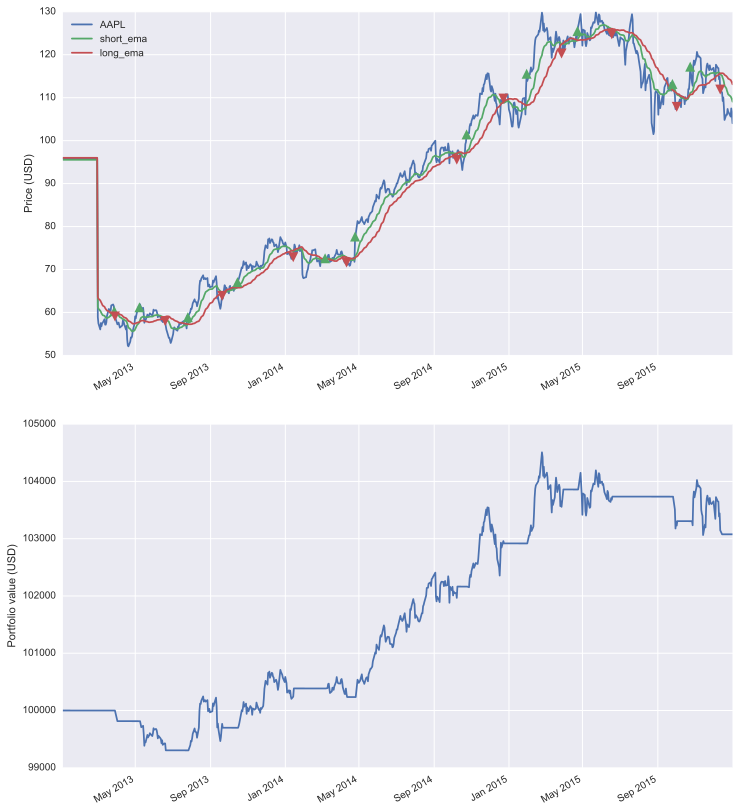

In [203]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,15))

ax1 = fig.add_subplot(211)
ax1.set_ylabel('Price (USD)')

ax2 = fig.add_subplot(212)
results.portfolio_value.plot(ax=ax2)
ax2.set_ylabel('Portfolio value (USD)')

results[['AAPL', 'short_ema', 'long_ema']].plot(ax=ax1)
results[results.buy.fillna(False)].AAPL.plot(ls="", marker="^", c="g", markersize=10, alpha=0.9, ax=ax1)
results[results.sell.fillna(False)].AAPL.plot(ls="", marker="v", c="r", markersize=10, alpha=0.9, ax=ax1)
plt.show()